In [1]:
#importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
file_name = "./UnProcessedStaticCaseData/FASToryPowerConsumptionData_UnProcessed.csv"
df= pd.read_csv(file_name)
#data summary
df.describe()

# Utility Functions

In [78]:
def customize_DF_reading(df, beltTension, LoadCombinations):
    """
    This function takes three arguments and returns a data frame:
    1. data frame
    2. beltTension: List or an int (query parameter)
    3. loadAlais: list or int (query parameter)

    This function returns a customized data frame based on respective query parameters and median
    """
    data_frame=pd.DataFrame()
    median=[]
    if (isinstance(beltTension,list) and isinstance(LoadCombinations,list)):
            for tension in beltTension:
                for load in LoadCombinations:
                    temp=df.loc[(df['%Belt Tension']==tension) &(df['Load Combinations']==load)]
                    median.append(round(temp['Power (W)'].median(),1))
                    data_frame=pd.concat([data_frame,temp])

    return (data_frame,median)

# Note about CNV data collection:

1. Main coneyor has 4 zones labled as Z1,Z2,Z3,Z5. This CNV can process up to 4 pallets.
2. These zones generates 16 different combinations for residing a pallet (load)for processing on main conveyor. Pallet quantity and position (Load) is varied on CNV according to these combinations which helps to track, how pallet quantity and position affct power consumed by conveyor motor driver.
3. These Combinations are listed below:

| Combination Number | Combination | Description|
|:--------------------|:-------------|:------------|
|0 | 0000 | No Load
|1 | 1000 | 1 Pallet at Z1
|2 | 0100 | 1 Pallet at Z2
|3 | 1100 | 2 pallets; 1 pallet at each zone (Z1,Z2)
|4 | 0010 | 1 Pallet at Z3
|5 | 1010 | 2 pallets; 1 pallet at each zone (Z1,Z3)
|6 | 0110 | 2 pallets; 1 pallet at each zone (Z3,Z3)
|7 | 1110 | 3 pallets; 1 pallet at each zone (Z1,Z2,Z3)
|8 | 0001 | 1 Pallet at Z5
|9 | 1001 | 2 pallets; 1 pallet at each zone (Z1,Z5)
|10 | 0101| 2 pallets; 1 pallet at each zone (Z2,Z5)
|11| 1101 | 3 pallets; 1 pallet at each zone (Z1,Z2,Z5)
|12| 0011 | 2 pallets; 1 pallet at each zone (Z3,Z5)
|13| 1011 | 3 pallets; 1 pallet at each zone (Z1,Z3,Z5)
|14| 0111 | 3 pallets; 1 pallet at each zone (Z2,Z3,Z5)
|15| 1111 | 4 pallets; 1 pallet at each zone (Z1,Z2,Z3,Z5)
    

In [79]:
def plot_data(df_concat,fig_name='None',title='None',df_x='Load Combinations',
                compare_against='%Belt Tension',x_label='',y_min=222,y_max=245,step=1):

    if step>1:
        fig, ax = plt.subplots(figsize=(15,8))#10,7 13,8,15,8
    else:
        fig, ax = plt.subplots(figsize=(10,7))#10,7 13,8,15,8
    plt.ylim([y_min-2,y_max+4])
    plt.yticks(np.arange(y_min-2,y_max+4,step))
    # remove all borders except bottom
    sns.despine(top=True,
                right=True,
                left=True,
                bottom=False)


    my_palette=sns.color_palette("deep")
    box_plot=sns.boxplot(y=df_concat['Power (W)'], x=df_concat[df_x],
                data=df_concat, orient='v',width=0.7,#0.7
                palette=my_palette,
                hue=df_concat[compare_against],
                showmeans=True,
                meanprops={"marker":"o","markerfacecolor":"white",
                "markeredgecolor":"blue","markersize":"5"}) 

    plt.xlabel(x_label, fontsize=15)#Load Combinations %Belt Tension
    plt.ylabel("Power Consumption (W)",fontsize=15)
    plt.tight_layout()
    sns.set(style='whitegrid')
    #plt.savefig('fig_name.png', dpi=500)
    plt.show()

 


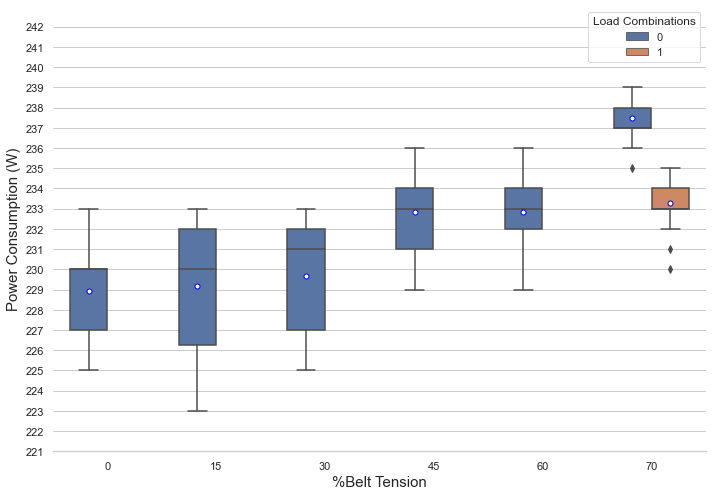

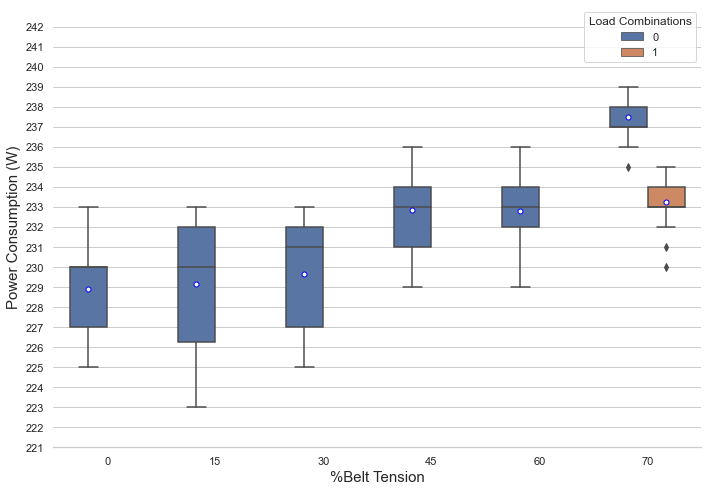

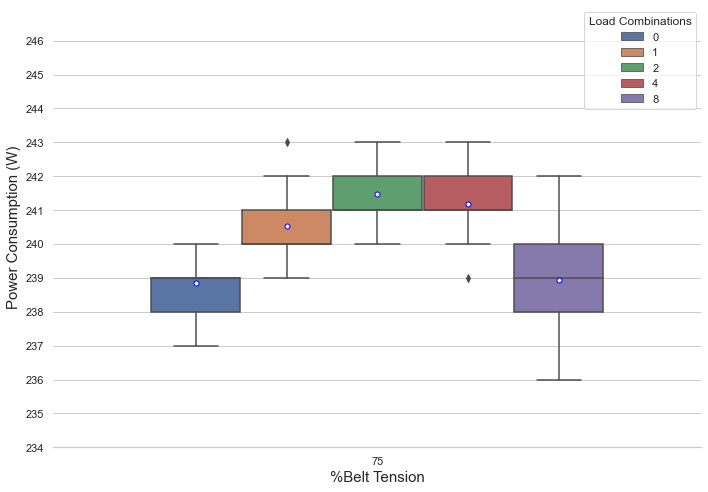

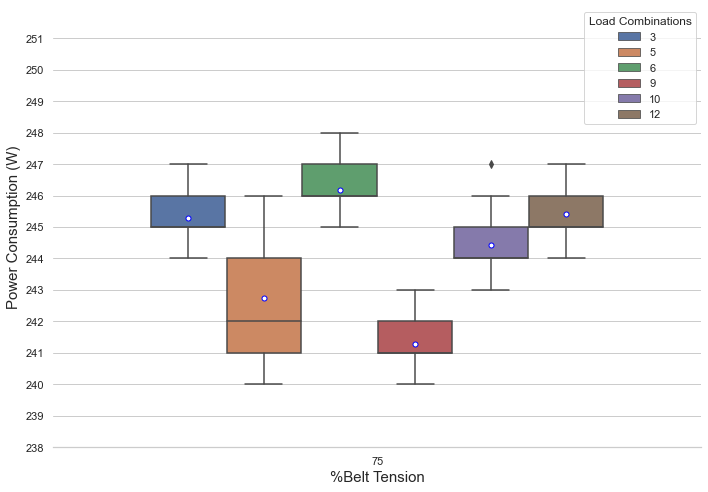

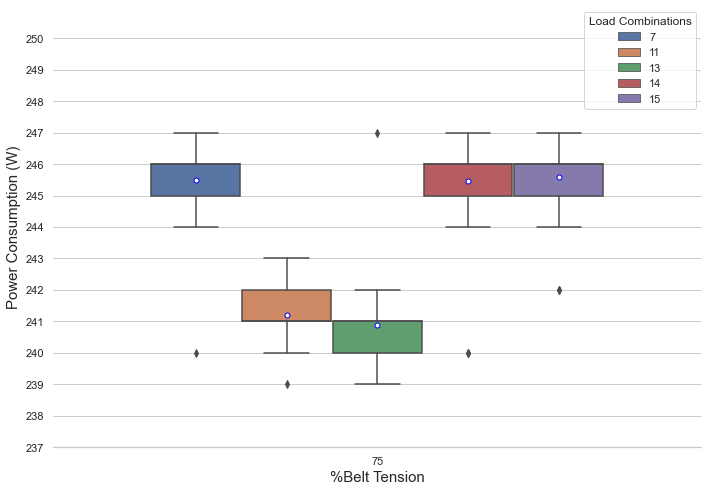

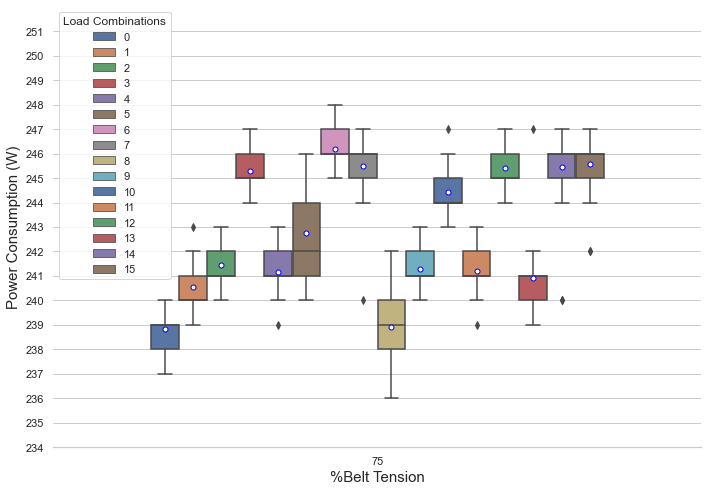

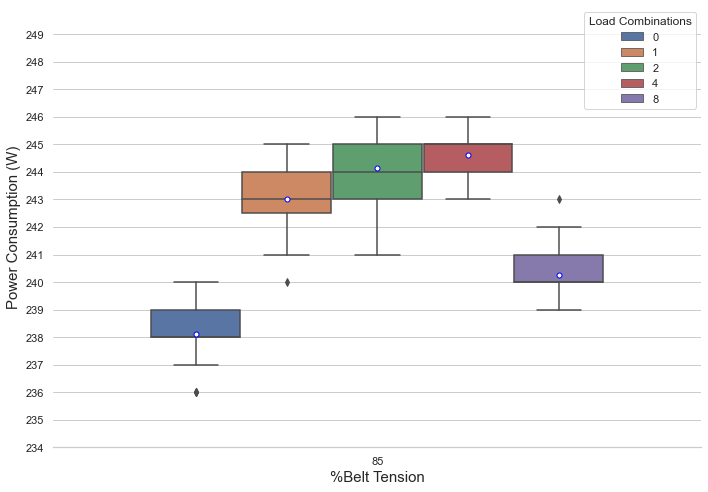

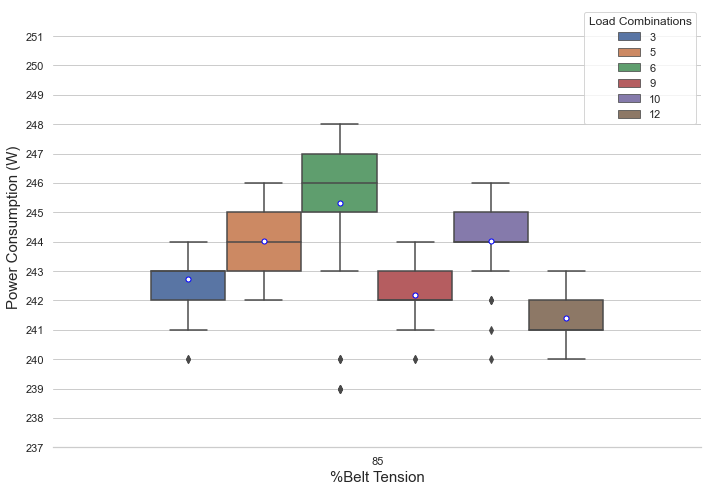

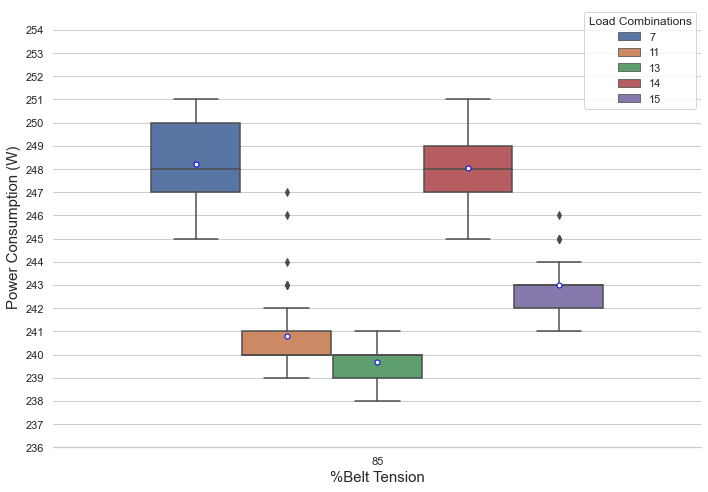

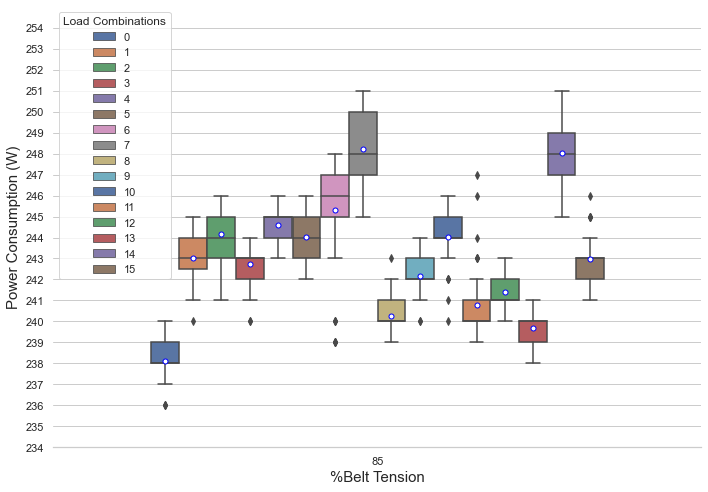

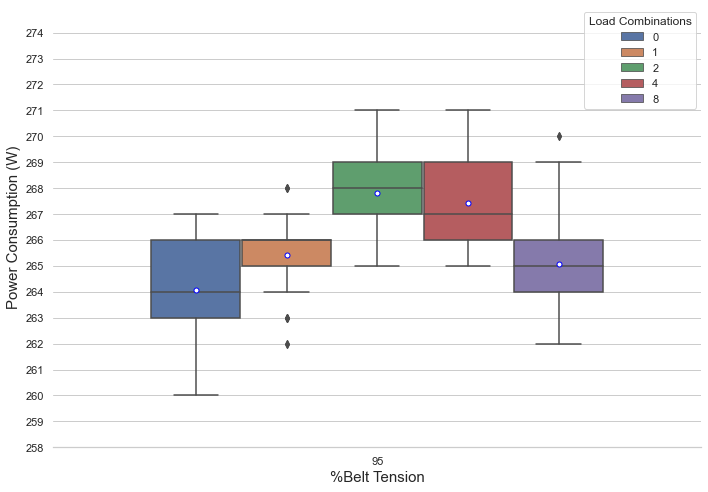

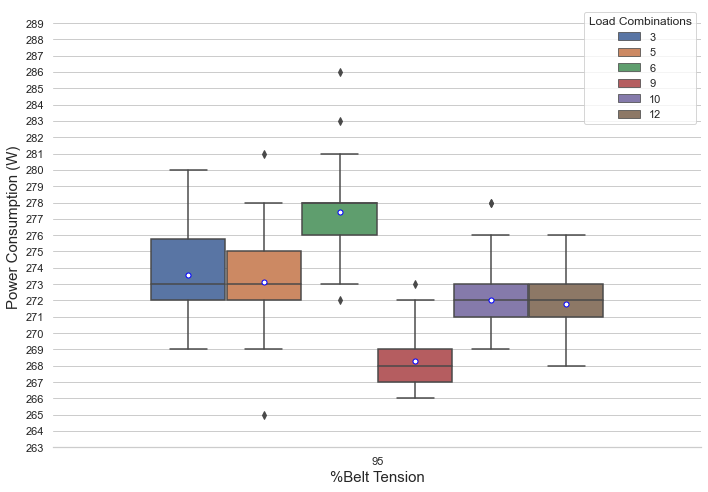

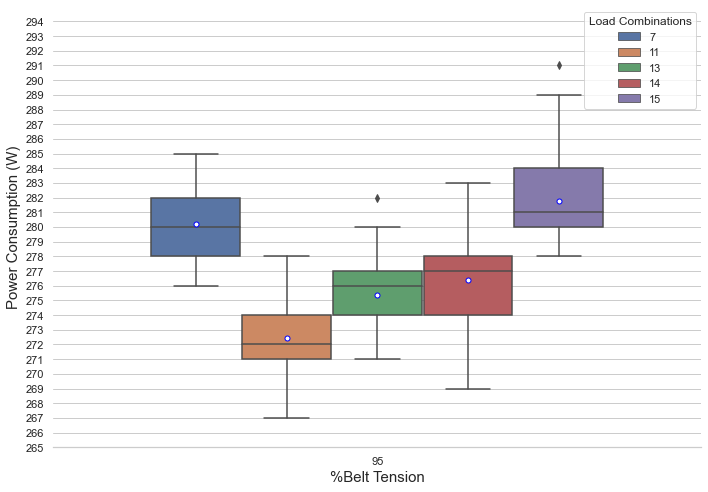

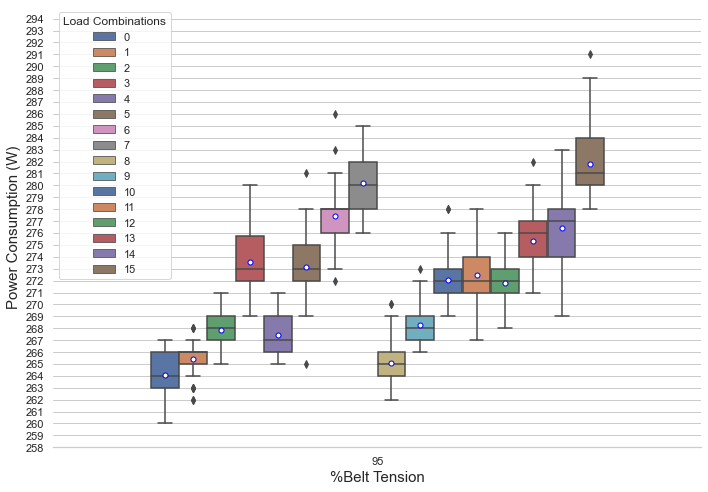

In [80]:
#plotting conveyor belt power consumption against belt tension for each load combination 
df
belt_tension = np.array(
                    [
                        [0,15,30,45,60,70],[75],[85],[95],
                    ],dtype=object
                    )#[0,1],
load_combination = np.array(
                     [
                         [0,1,2,4,8],[3,5,6,9,10,12],[7,11,13,14,15],
                         [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
                     ],dtype=object
                    )


for i in range(len(belt_tension)):    
    for j in range(len(load_combination)):
        df_concat,median=customize_DF_reading(df, belt_tension[i],load_combination[j])
        if not(df_concat.empty):
            df_min,df_max =(df_concat["Power (W)"].min(),df_concat["Power (W)"].max())
            plot_data(  df_concat,fig_name=f'BTvsPowerWithLoadCombinationas_hue{i}_{j}',title='None',
                        compare_against='Load Combinations',df_x='%Belt Tension',
                        x_label="%Belt Tension",y_min=df_min,y_max=df_max)

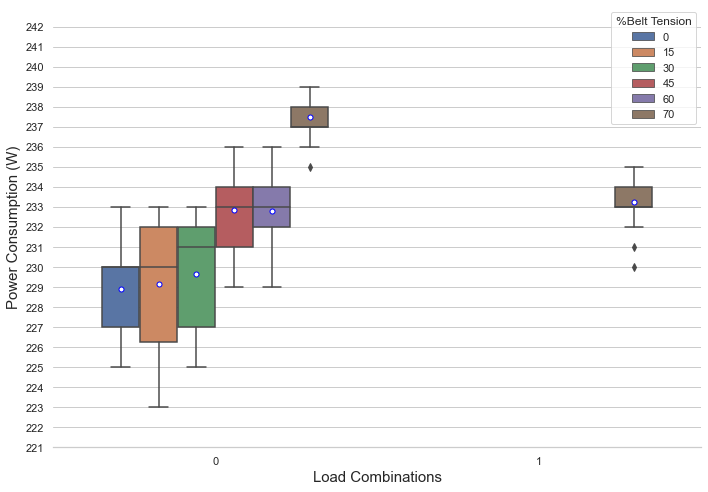

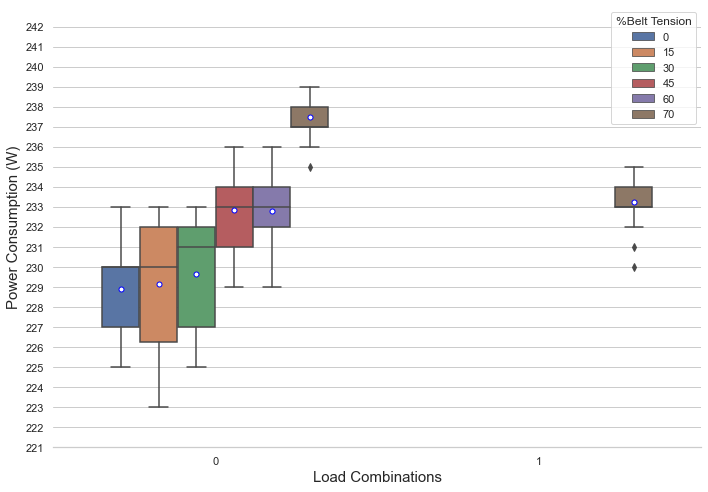

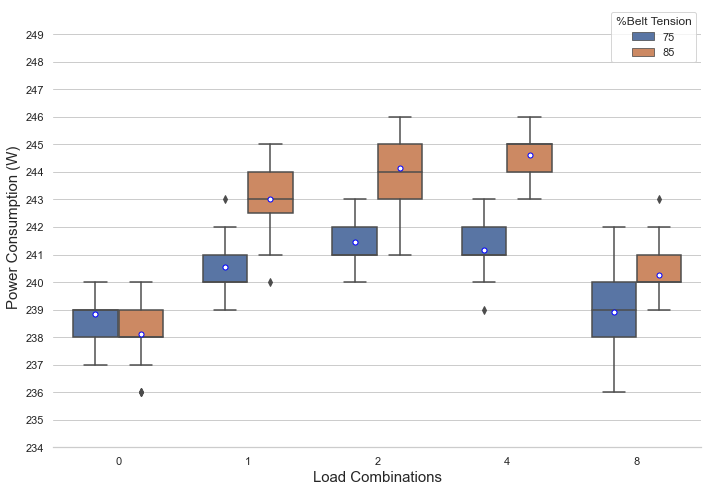

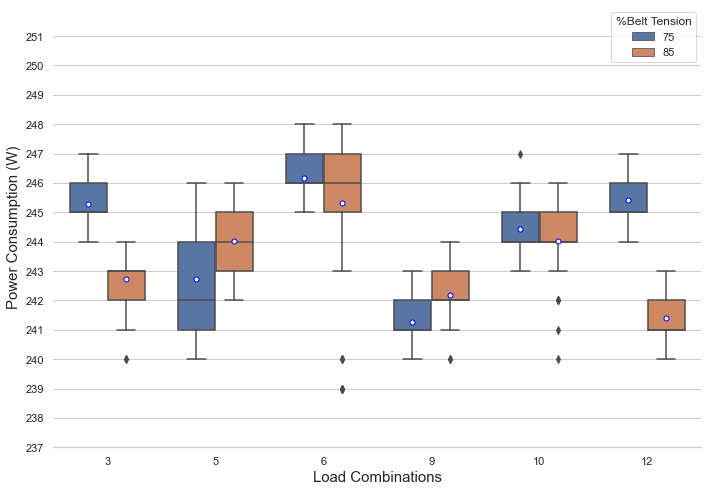

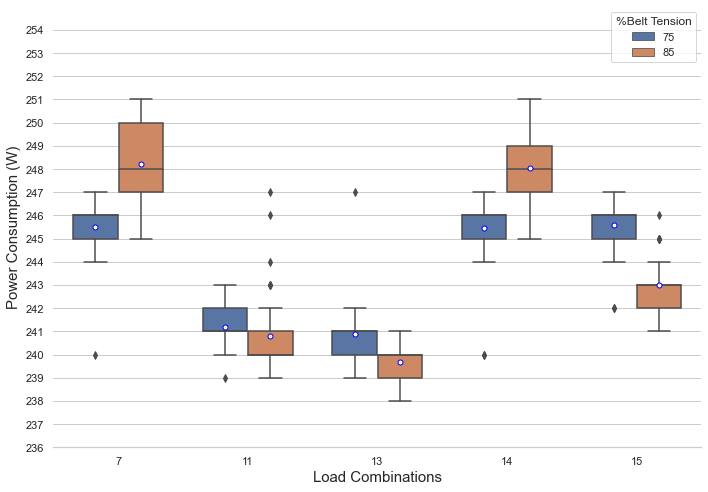

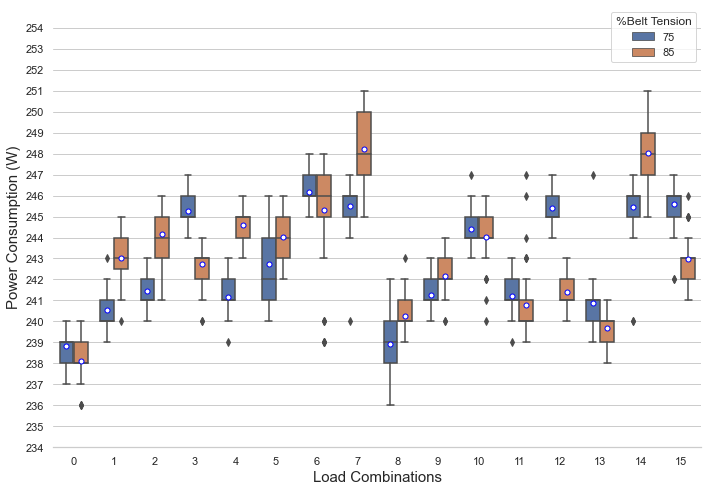

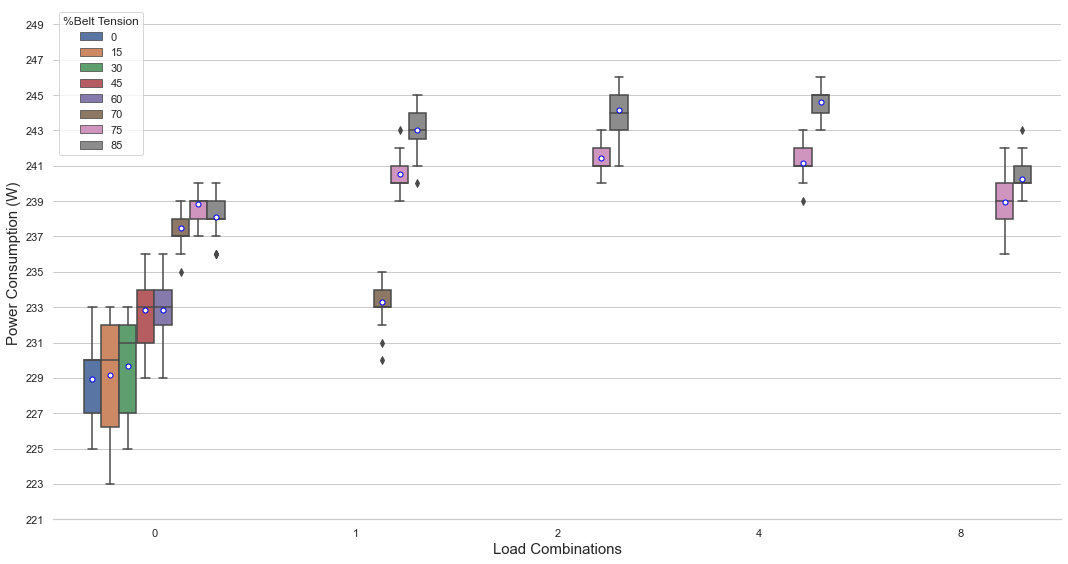

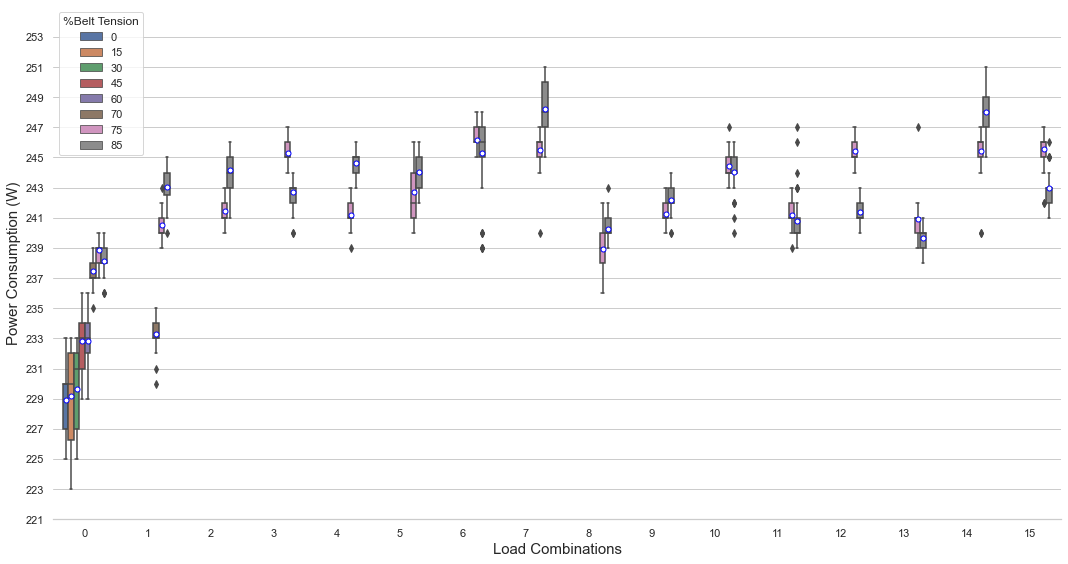

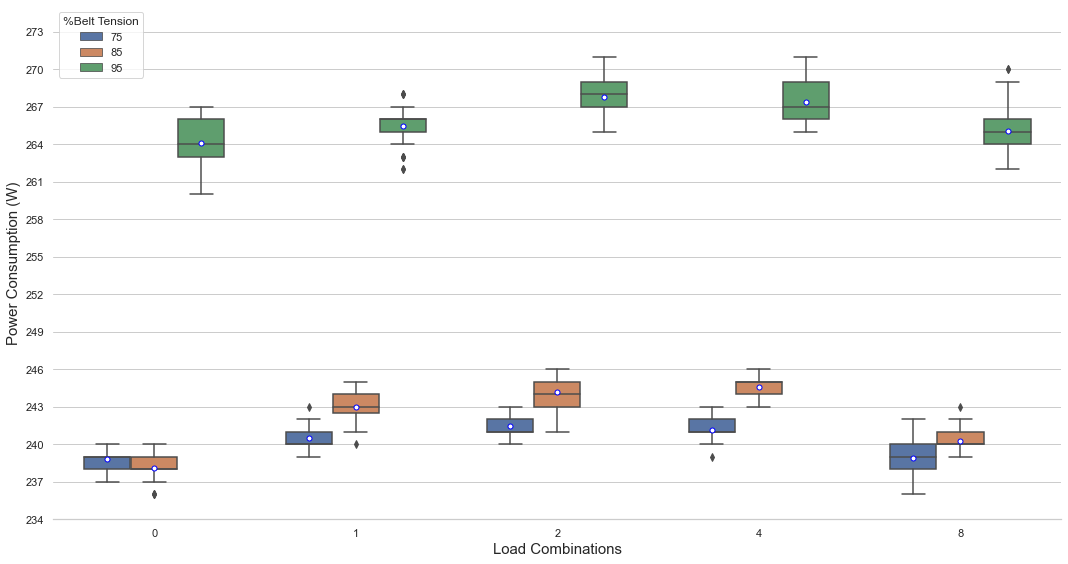

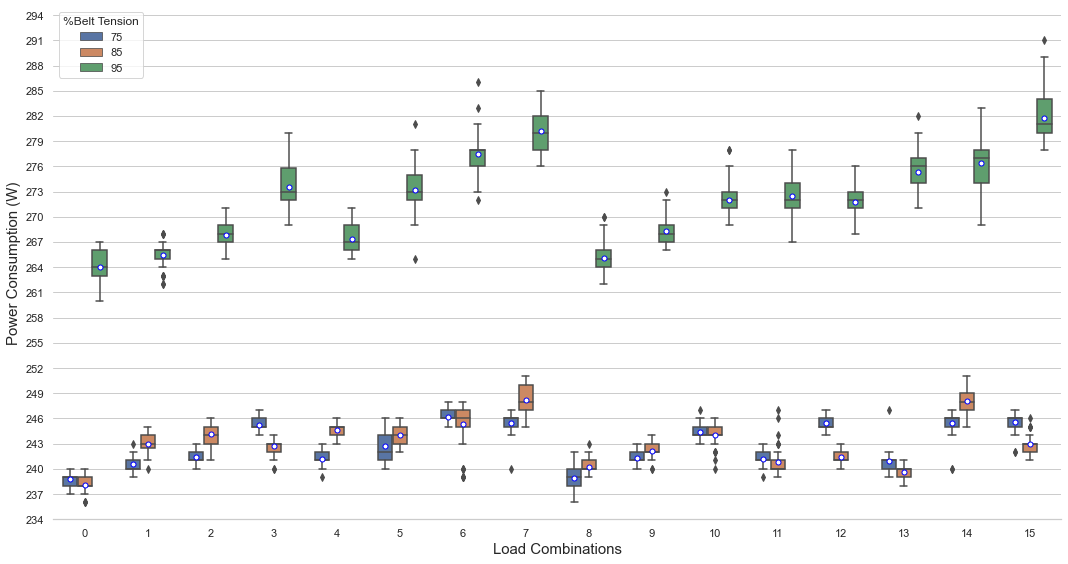

In [82]:
#plotting conveyor belt power consumption against load combination for each belt tension 
belt_tension = np.array(
                    [
                        [0,15,30,45,60,70],[75,85],[0,15,30,45,60,70,75,85],[75,85,95],
                    ],dtype=object
                    )
load_combination = np.array(
                     [
                         [0,1,2,4,8],[3,5,6,9,10,12],[7,11,13,14,15],
                         [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
                     ],dtype=object
                    )

step =1
for i in range(len(belt_tension)): 
    if i==2:
        step=2 
    if i==3:
        step=3 
    for j in range(len(load_combination)):
        df_concat,median=customize_DF_reading(df, belt_tension[i],load_combination[j])

        if not(df_concat.empty):
            df_min,df_max =(df_concat["Power (W)"].min(),df_concat["Power (W)"].max())
            if i>=2 and (j==1 or j==2):
                pass
            else:
                plot_data(  df_concat,fig_name=1,title='None',
                            compare_against='%Belt Tension',df_x='Load Combinations',
                            x_label="Load Combinations",y_min=df_min,y_max=df_max,step=step)